# Classifier function demo

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from py.classifiers import classify

Create some data

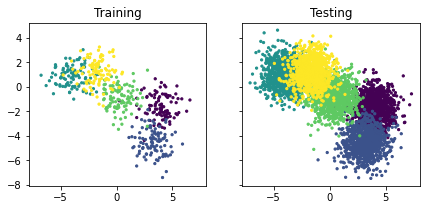

In [4]:
state = np.random.seed(6)
ntrain, ntest = 100, 1000
nclasses = 5
means = [np.random.uniform(-5, 5, size=2) for _ in range(nclasses)]

X_tr = np.vstack([np.random.normal(loc=mu, size=(ntrain, 2)) for mu in means])
X_te = np.vstack([np.random.normal(loc=mu, size=(ntest, 2)) for mu in means])
y_tr = np.hstack([[i]*ntrain for i in range(nclasses)])
y_te = np.hstack([[i]*ntest for i in range(nclasses)])

fig, axes = plt.subplots(1, 2, figsize=(7, 3), sharey=True, sharex=True)
for ax, X, y, title in zip(axes, (X_tr, X_te), (y_tr, y_te), ('Training', 'Testing')):
    ax.scatter(X[:, 0], X[:, 1], s=5, c=y)
    ax.set_title(title)

Run classifiers

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


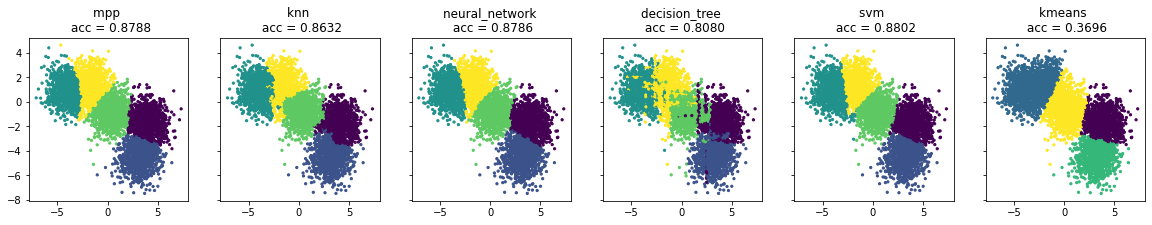

In [5]:
method_kwargs_list = [
    ('mpp', dict(case=3)), 
    ('knn', dict(n_neighbors=5)),
    ('neural_network', dict()),
    ('decision_tree', dict()),
    ('svm', dict(kernel='linear')),
    ('kmeans', dict(n_clusters=4))
]

fig, axes = plt.subplots(1, 6, sharey=True, sharex=True, figsize=(20, 3))

for (method, kwargs), ax in zip(method_kwargs_list, axes):
    y_pred = classify(X_tr, y_tr, X_te, method, **kwargs)
    ax.scatter(X_te[:, 0], X_te[:, 1], s=5, c=y_pred)
    ax.set_title('{} \n acc = {:.4f}'.format(method, accuracy_score(y_pred, y_te)))